In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

- 随机森林demo https://zhuanlan.zhihu.com/p/164990454

## 加载数据

In [8]:
df=pd.read_csv('HR_comma_sep.csv')

## 缺失值处理

In [6]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [7]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## 列重命名

In [12]:
df=df.rename({'satisfaction_level':'satisfaction','last_evaluation':'evaluation','number_project':'projectCount',
              'average_montly_hours':'average_MontlyHours','time_spend_company':'yearsAtCompany','Work_accident':'workAccident',
              'promotion_last_5years':'promotion','sales':'department','left':'turnover'},axis=1)

## 将是否离职 turnover 放在首列

In [15]:
front = df['turnover']
df.drop(labels=['turnover'],axis=1,inplace=True)
df.insert(0,'turnover',front)
df.head()

,turnover,satisfaction,evaluation,projectCount,average_MontlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


## 数据统计分析

In [16]:
df.shape

(14999, 10)

In [18]:
df.dtypes

turnover                 int64
satisfaction           float64
evaluation             float64
projectCount             int64
average_MontlyHours      int64
yearsAtCompany           int64
workAccident             int64
promotion                int64
department              object
salary                  object
dtype: object

In [19]:
# 离职率
turnover_rate=df.turnover.value_counts()/len(df)
turnover_rate

0    0.761917
1    0.238083
Name: turnover, dtype: float64

In [20]:
df.describe()

,turnover,satisfaction,evaluation,projectCount,average_MontlyHours,yearsAtCompany,workAccident,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [23]:
#分组统计
turnover_summary=df.groupby('turnover')
turnover_summary.mean()

,satisfaction,evaluation,projectCount,average_MontlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


## 相关性分析:
* 什么特征影响最大？
* 什么特征间相关性最大？

## 正相关特征：
* projectCount VS evaluation:0.349333
* projectCount VS average_MontlyHours:0.417211
* average_MontlyHours VS evaluation:0.339742

## 负相关特征：
* satisfaction VS turnover:-0.388375

In [26]:
#相关性矩阵
corr=df.corr()
corr

,turnover,satisfaction,evaluation,projectCount,average_MontlyHours,yearsAtCompany,workAccident,promotion
turnover,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788
satisfaction,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
projectCount,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
average_MontlyHours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
yearsAtCompany,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
workAccident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


<AxesSubplot:>

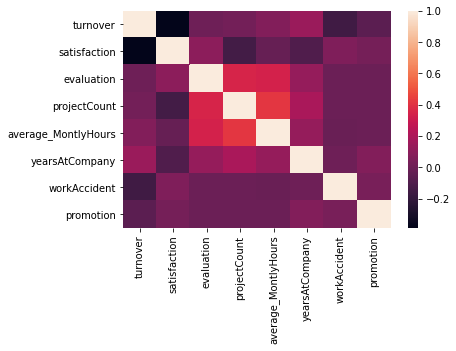

In [27]:
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

In [29]:
#比较离职和未离职员工满意度
print('离职满意度：',df[df.turnover==1]['satisfaction'].mean())
print('未离职满意度：',df[df.turnover==0]['satisfaction'].mean())

离职满意度： 0.4400980117614114
未离职满意度： 0.666809590479524


## 进行T检验
* 看看离职员工满意度是不是和未离职员工满意度明显不同

In [31]:
import scipy.stats as stats
stats.ttest_1samp(a=df[df.turnover==1]['satisfaction'],#离职员工满意度样本
                 popmean=df[df.turnover==0]['satisfaction'].mean() )#未离职员工满意度均值

Ttest_1sampResult(statistic=-51.33034867547431, pvalue=0.0)

## T检验 显示 p值很小0.0，所以他们之间显著不同

In [32]:
degree_freedom =len(df[df.turnover==1])
#临界值
LQ=stats.t.ppf(0.025,degree_freedom) # 95% 置信区间左边界
RQ=stats.t.ppf(0.975,degree_freedom) # 95% 置信区间右边界
print('t-分布 左边界',str(LQ))
print('t-分布 右边界',str(RQ))

t-分布 左边界 -1.9606285215955626
t-分布 右边界 1.9606285215955621


Text(0.5, 1.0, '工作评价的概率密度函数-离职 v.s. 未离职')

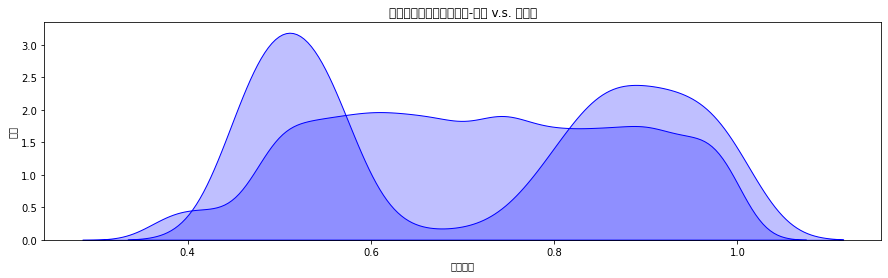

In [33]:
# 工作评价的概率密度函数估计
fig=plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['turnover']==0),'evaluation'],color='b',shade=True,label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover']==1),'evaluation'],color='b',shade=True,label='turnover')
ax.set(xlabel='工作评价',ylabel='频率')
plt.title('工作评价的概率密度函数 - 离职 v.s. 未离职')
# 未离职为平滑，离职的为两个峰 

Text(0.5, 1.0, '月工作时长的概率密度函数 - 离职 v.s. 未离职')

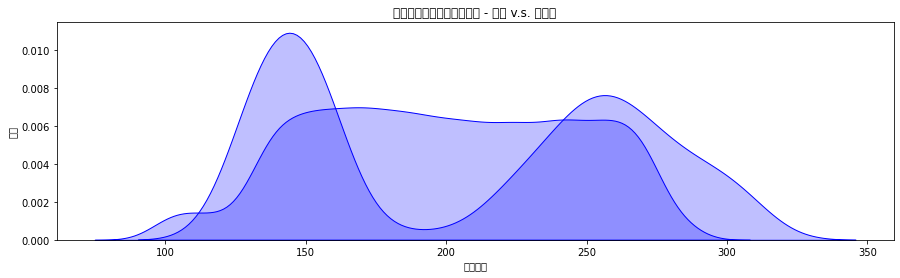

In [35]:
# 月工作时长的概率密度函数估计
fig=plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['turnover']==0),'average_MontlyHours'],color='b',shade=True,label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover']==1),'average_MontlyHours'],color='b',shade=True,label='turnover')
ax.set(xlabel='average_MontlyHours',ylabel='频率')
plt.title('月工作时长的概率密度函数 - 离职 v.s. 未离职')
# 未离职为平滑，离职的为两个峰

Text(0.5, 1.0, '员工满意度的概率密度函数 - 离职 v.s. 未离职')

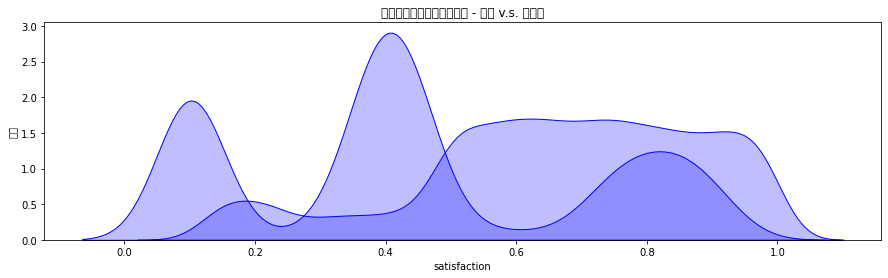

In [37]:
# 员工满意度的概率密度函数估计
fig=plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['turnover']==0),'satisfaction'],color='b',shade=True,label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover']==1),'satisfaction'],color='b',shade=True,label='turnover')
ax.set(xlabel='satisfaction',ylabel='频率')
plt.title('员工满意度的概率密度函数 - 离职 v.s. 未离职')
# 未离职为平滑，离职的为三个峰 也就是说对公司满意程度的高低影响离职率也不是线性的

In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,confusion_matrix

In [41]:
df.dtypes

turnover                 int64
satisfaction           float64
evaluation             float64
projectCount             int64
average_MontlyHours      int64
yearsAtCompany           int64
workAccident             int64
promotion                int64
department              object
salary                  object
dtype: object

In [46]:
# 将 string 类型转为 整数类型

df['department']= df['department'].astype('category').cat.codes
df['salary']=df['salary'].astype('category').cat.codes

#产生X,Y 即特征列与标签列
target_name='turnover'
X=df.drop('turnover',axis=1)
y=df[target_name]

#将数据氛分为训练集测试集
# 参数 stratify=y 意味着在产生训练和测试数据中，离职的员工的百分比等于总数据中离职员工百分比

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=123, stratify=y)
df.head()

,turnover,satisfaction,evaluation,projectCount,average_MontlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,7,1
1,1,0.80,0.86,5,262,6,0,0,7,2
2,1,0.11,0.88,7,272,4,0,0,7,2
3,1,0.72,0.87,5,223,5,0,0,7,1
4,1,0.37,0.52,2,159,3,0,0,7,1


In [44]:
df.dtypes

turnover                 int64
satisfaction           float64
evaluation             float64
projectCount             int64
average_MontlyHours      int64
yearsAtCompany           int64
workAccident             int64
promotion                int64
department                int8
salary                  object
dtype: object

## 决策树 和 随机森林

In [50]:
from sklearn.metrics import roc_auc_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree    
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz   #画图
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus   #画图

## 决策树

In [52]:
#定义
dtree=DecisionTreeClassifier(criterion='entropy',
#                              max_depth=3,
                             min_weight_fraction_leaf=0.01  #定义叶子结点最少需要多少样本（百分比），防止过拟合
                            )
#训练
dtree=dtree.fit(X_train,y_train)

#指标计算
dt_roc_auc=roc_auc_score(y_test,dtree.predict(X_test))
print('决策树AUC = %2.2f' % dt_roc_auc)
print(classification_report(y_test,dtree.predict(X_test)))

决策树AUC = 0.93
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1714
           1       0.93      0.89      0.91       536

    accuracy                           0.96      2250
   macro avg       0.95      0.93      0.94      2250
weighted avg       0.96      0.96      0.96      2250



## 决策树可视化

In [54]:
# 需安装Graphviz 和pydotplus 进行决策树可视化
# 特征向量
feature_names=df.columns[1:]
#文件缓存
dot_data=StringIO()

#将决策树导入dot中
export_graphviz(dtree,out_file=dot_data,
               filled=True,rounded=True,
               special_characters=True,feature_names=feature_names,class_names=['0','1'])
#将生成的dot 文件生成graph
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
#将结果存入png
graph.write_png('diabetes.png')
#显示
Image(graph.create_png())

InvocationException: GraphViz's executables not found

## 决策树的特征重要性分析

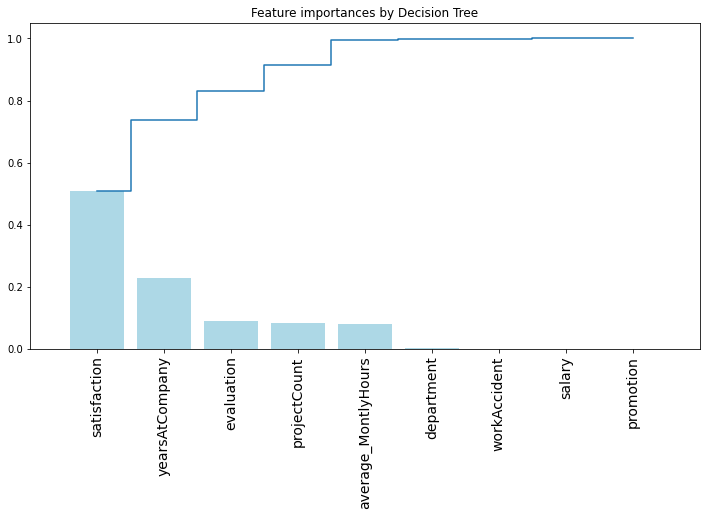

In [57]:
#获取特征重要性
importances = dtree.feature_importances_
#获取特征名称
feat_names=df.drop(['turnover'],axis=1).columns
#排序
indices= np.argsort(importances)[::-1]
#绘图
plt.figure(figsize=(12,6))
plt.title("Feature importances by Decision Tree")
plt.bar(range(len(indices)),importances[indices],color='lightblue',align='center')
plt.step(range(len(indices)),np.cumsum(importances[indices]),where='mid',label='Cumulative')
plt.xticks(range(len(indices)),feat_names[indices],rotation='vertical',fontsize=14)
plt.xlim([-1,len(indices)])
plt.show()        

## 随机森林

In [59]:
#实例化随机森林
rf=RandomForestClassifier(
    criterion='entropy',
    n_estimators=3,
    max_depth=None,
    min_samples_split=10, #定义至少多少个样本才继续分裂
#     min_weight_fraction_leaf=0.02  #定义叶子结点最少需要多少样本（百分比），防止过拟合
)
#模型训练
rf.fit(X_train,y_train)
#计算指标参数
rf_roc_auc= roc_auc_score(y_test,rf.predict(X_test))
print('随机森林 AUC = %2.2f' % rf_roc_auc)
print(classification_report(y_test,rf.predict(X_test)))

随机森林 AUC = 0.97
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1714
           1       0.98      0.94      0.96       536

    accuracy                           0.98      2250
   macro avg       0.98      0.97      0.97      2250
weighted avg       0.98      0.98      0.98      2250



## 随机森林可视化

In [60]:
# Graphviz 中未提供多棵树绘制方法，所以我们遍历森林中树，分别绘制
Estimators=rf.estimators_

#遍历
for index,model in enumerate(Estimators):
    #文件缓存
    dot_data=StringIO()

    #将决策树导入dot中
    export_graphviz(model,out_file=dot_data,
                    feature_names=df.columns[1:],
                    class_names=['0','1'],
                   filled=True,rounded=True,
                   special_characters=True)
    #将生成的dot 文件生成graph
    graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
    #将结果存入png
    graph.write_png('Rf{}.png'.format(index))
    #绘制图像
    plt.figure(figsize=(20,20))
    plt.imshow(plt.imread('Rf{}.png'.format(index)))
    plt.axis('off')

InvocationException: GraphViz's executables not found

## 随机森林特征分析

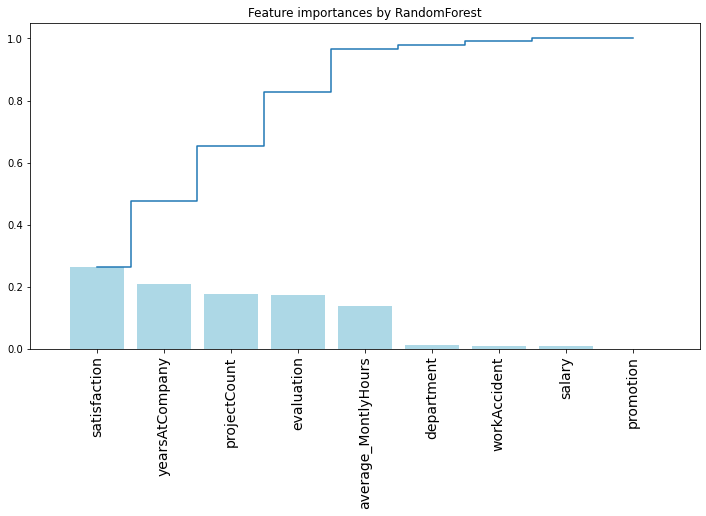

In [61]:
#获取特征重要性
importances = rf.feature_importances_
#获取特征名称
feat_names=df.drop(['turnover'],axis=1).columns
#排序
indices= np.argsort(importances)[::-1]
#绘图
plt.figure(figsize=(12,6))
plt.title("Feature importances by RandomForest")
plt.bar(range(len(indices)),importances[indices],color='lightblue',align='center')
plt.step(range(len(indices)),np.cumsum(importances[indices]),where='mid',label='Cumulative')
plt.xticks(range(len(indices)),feat_names[indices],rotation='vertical',fontsize=14)
plt.xlim([-1,len(indices)])
plt.show()        

## Roc曲线

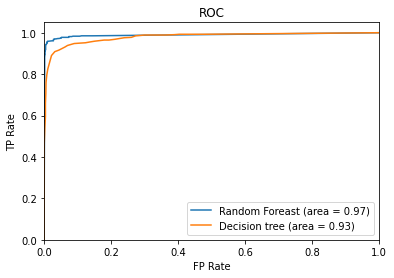

In [64]:
from sklearn.metrics import roc_curve

#计算ROC曲线
rf_fpr,rf_tpr,rf_thresholds = roc_curve(y_test,rf.predict_proba(X_test)[:,1])
dt_fpr,dt_tpr,dt_thresholds = roc_curve(y_test,dtree.predict_proba(X_test)[:,1])

plt.figure()

#随机森林 ROC
plt.plot(rf_fpr,rf_tpr,label='Random Foreast (area = %0.2f)' % rf_roc_auc)

#决策树 ROC
plt.plot(dt_fpr,dt_tpr,label='Decision tree (area = %0.2f)' % dt_roc_auc)

#绘图
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

In [4]:
import datetime
datetime.datetime.strftime(datetime.date.today(),"%Y-%m-%d").replace('-','')

'20210607'

In [6]:
(datetime.datetime.strptime(datetime.date.today(), "%Y-%m-%d") + datetime.timedelta(days=1)).strftime("%Y-%m-%d")

TypeError: strptime() argument 1 must be str, not datetime.date

In [9]:
(datetime.date.today() + datetime.timedelta(days=-1)).strftime('%Y-%m-%d').replace('-','')

'20210606'

In [10]:
17175792-16994880

180912

In [11]:
180912/48

3769.0

In [12]:
17000688-16994880

5808

In [13]:
5808/48

121.0